# Health and Nutrition Data Exploration
Dataset: https://www.kaggle.com/theworldbank/health-nutrition-and-population-statistics

### 1) Download the dataset and save it to a sqlite database

In [80]:
import pandas as pd
from sqlalchemy import create_engine
from matplotlib import pyplot as plt

In [84]:
import plotly.plotly as py
import plotly.graph_objs as go
init_notebook_mode(connected=True)

ImportError: No module named 'plotly'

In [28]:
%matplotlib inline

In [2]:
eng = create_engine('sqlite:///healthdata.db')

In [5]:
import os
os.getcwd()

'/home/bob/Documents/Business/FrontAnalytics/code/dpl_da_course/data_analytics_course/ExercisesByWeek/05-DataVisualizations/01-DataDiscoveryPractice'

In [6]:
df = pd.read_csv('world_health_data.csv')
df.shape

(89010, 61)

In [7]:
df.to_sql('world_health', eng)

### 2) How many countries are listed in this dataset?

In [8]:
df.columns

Index(['﻿"Country Name"', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', 'Unnamed: 60'],
      dtype='object')

In [14]:
df.rename(columns={'"Country Name"':'country_name'}, inplace=True)

In [21]:
df.columns = ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016']
df.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016'],
      dtype='object')

In [17]:
len(df['Country Name'].unique())

258

### 3) How many unique indicators are there?

In [18]:
len(df['Indicator Name'].unique())

345

In [19]:
258*345

89010

In [20]:
df.shape

(89010, 61)

### 4) Which indicator has the highest percent increase from 1960 to 2016?

In [24]:
df.dtypes

Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
1960              float64
1961              float64
1962              float64
1963              float64
1964              float64
1965              float64
1966              float64
1967              float64
1968              float64
1969              float64
1970              float64
1971              float64
1972              float64
1973              float64
1974              float64
1975              float64
1976              float64
1977              float64
1978              float64
1979              float64
1980              float64
1981              float64
1982              float64
1983              float64
1984              float64
1985              float64
                   ...   
1988              float64
1989              float64
1990              float64
1991              float64
1992              float64
1993              float64
1994              float64
1995        

In [26]:
df['delta'] = df['2015'] - df['1960']
df['delta'].sample(20)

43713         4.780012
72483     61271.000000
31470              NaN
53523     -7382.000000
47025   -359862.000000
48706    352099.000000
19053              NaN
77650    444831.000000
6506               NaN
56925              NaN
38929              NaN
12097              NaN
17784              NaN
27137        -0.321917
54131              NaN
15055        -3.405216
24963              NaN
17624     49139.000000
61266              NaN
28481              NaN
Name: delta, dtype: float64

In [27]:
df['delta_pct'] = df['delta'] / df['1960']

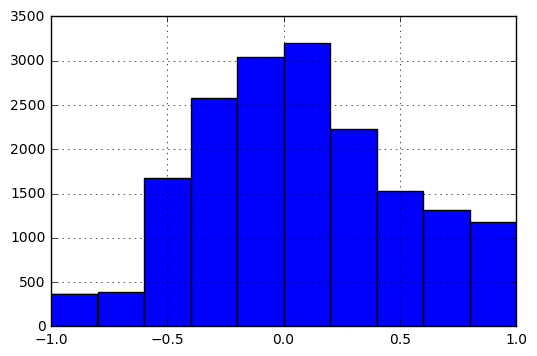

In [30]:
df['delta_pct'].hist(range=(-1, 1))

In [31]:
df.sort_values('delta_pct', ascending=False)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,delta,delta_pct
84691,United Arab Emirates,ARE,Male population 40-44,SP.POP.4044.MA,2042.00000,2210.00000,2552.0000,3036.00000,3612.00000,4246.00000,...,5.678160e+05,6.464840e+05,7.223140e+05,7.914710e+05,8.495750e+05,8.933150e+05,9.230060e+05,NaN,920964.0,451.010774
84690,United Arab Emirates,ARE,Male population 35-39,SP.POP.3539.MA,2410.00000,2793.00000,3394.0000,4174.00000,5058.00000,5992.00000,...,8.817950e+05,1.007670e+06,1.074895e+06,1.100170e+06,1.091885e+06,1.068473e+06,1.046110e+06,NaN,1043700.0,433.070539
84689,United Arab Emirates,ARE,Male population 30-34,SP.POP.3034.MA,2825.00000,3464.00000,4348.0000,5436.00000,6632.00000,7866.00000,...,1.051050e+06,1.149894e+06,1.163400e+06,1.143938e+06,1.107728e+06,1.073235e+06,1.052494e+06,NaN,1049669.0,371.564248
84692,United Arab Emirates,ARE,Male population 45-49,SP.POP.4549.MA,1705.00000,1760.00000,1931.0000,2180.00000,2472.00000,2805.00000,...,3.880370e+05,4.408220e+05,4.845210e+05,5.123510e+05,5.316720e+05,5.547440e+05,5.889040e+05,NaN,587199.0,344.398240
84688,United Arab Emirates,ARE,Male population 25-29,SP.POP.2529.MA,3305.00000,4208.00000,5389.0000,6802.00000,8329.00000,9882.00000,...,9.480200e+05,1.018289e+06,1.013105e+06,9.942950e+05,9.712830e+05,9.488960e+05,9.267120e+05,NaN,923407.0,279.396974
84693,United Arab Emirates,ARE,Male population 50-54,SP.POP.5054.MA,1448.00000,1411.00000,1474.0000,1601.00000,1760.00000,1937.00000,...,1.967190e+05,2.310410e+05,2.704480e+05,3.072830e+05,3.397610e+05,3.675650e+05,3.923400e+05,NaN,390892.0,269.953039
84751,United Arab Emirates,ARE,"Population ages 15-64, male",SP.POP.1564.MA.IN,24237.00000,28653.00000,34669.0000,41768.00000,49084.00000,56064.00000,...,5.154192e+06,5.617279e+06,5.867720e+06,5.979957e+06,5.995103e+06,5.978320e+06,5.978641e+06,NaN,5954404.0,245.674135
84588,United Arab Emirates,ARE,"Age population, age 25, male, interpolated",SP.POP.AG25.MA.IN,702.00000,905.00000,1163.0000,1469.00000,1809.00000,2157.00000,...,1.712340e+05,1.822990e+05,1.819110e+05,1.807470e+05,1.764150e+05,1.672380e+05,1.549800e+05,NaN,154278.0,219.769231
84586,United Arab Emirates,ARE,"Age population, age 24, male, interpolated",SP.POP.AG24.MA.IN,723.00000,937.00000,1206.0000,1535.00000,1893.00000,2245.00000,...,1.599580e+05,1.693430e+05,1.705040e+05,1.676720e+05,1.589150e+05,1.463330e+05,1.345740e+05,NaN,133851.0,185.132780
84694,United Arab Emirates,ARE,Male population 55-59,SP.POP.5559.MA,1181.00000,1093.00000,1074.0000,1099.00000,1148.00000,1211.00000,...,8.994000e+04,1.010720e+05,1.207380e+05,1.403140e+05,1.596100e+05,1.797030e+05,2.018980e+05,NaN,200717.0,169.955123


In [37]:
indicator_means = df.groupby(['Indicator Name', 'Indicator Code']).mean()
indicator_means.head()

,,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2009,2010,2011,2012,2013,2014,2015,2016,delta,delta_pct
Indicator Name,Indicator Code,,,,,,,,,,,,,,,,,,,,,
% of females ages 15-49 having comprehensive correct knowledge about HIV (2 prevent ways and reject 3 misconceptions),SH.HIV.KNOW.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,31.714286,28.683333,26.050000,30.788462,27.626667,30.900000,27.550000,NaN,NaN,NaN
% of males ages 15-49 having comprehensive correct knowledge about HIV (2 prevent ways and reject 3 misconceptions),SH.HIV.KNOW.MA.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,35.018182,40.380000,35.309091,32.705263,34.100000,43.707692,29.975000,NaN,NaN,NaN
AIDS estimated deaths (UNAIDS estimates),SH.DYN.AIDS.DH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,28475.000000,26716.666667,25300.925926,24684.259259,22799.074074,21008.333333,19574.074074,NaN,NaN,NaN
ARI treatment (% of children under 5 taken to a health provider),SH.STA.ARIC.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,65.241667,58.055172,60.133333,60.548934,57.217647,60.964516,39.850000,NaN,NaN,NaN
"Adolescent fertility rate (births per 1,000 women ages 15-19)",SP.ADO.TFRT,100.790334,100.763747,100.715669,100.16419,99.616816,99.078409,98.53104,97.988857,97.252911,96.520806,...,53.125731,52.153911,51.179432,50.205153,48.982447,47.757417,NaN,NaN,NaN,NaN


In [38]:
indicator_means.sample(5)

,,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2009,2010,2011,2012,2013,2014,2015,2016,delta,delta_pct
Indicator Name,Indicator Code,,,,,,,,,,,,,,,,,,,,,
Adults (ages 15+) living with HIV,SH.DYN.AIDS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,531656.481481,538383.333333,552136.111111,561053.703704,575348.148148,587043.518519,600691.666667,NaN,NaN,NaN
"Prevalence of wasting, female (% of children under 5)",SH.STA.WAST.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.303846,5.550000,6.983333,5.817241,7.150000,4.371429,NaN,NaN,NaN,NaN
"Prevalence of HIV, male (% ages 15-24)",SH.HIV.1524.MA.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.658224,0.644390,0.629928,0.626814,0.618396,0.612795,0.605760,NaN,NaN,NaN
"Mortality rate, under-5, female (per 1,000)",SH.DYN.MORT.FE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,36.802514,NaN,NaN,NaN,NaN,30.070399,NaN,NaN,NaN
"Prevalence of wasting, male (% of children under 5)",SH.STA.WAST.MA.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.461538,6.650000,8.016667,6.780000,8.616667,6.075000,NaN,NaN,NaN,NaN


In [39]:
indicator_means.shape

(345, 59)

In [42]:
indicator_means.columns

Index(['1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', 'delta', 'delta_pct'],
      dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f35901d1320>]], dtype=object)

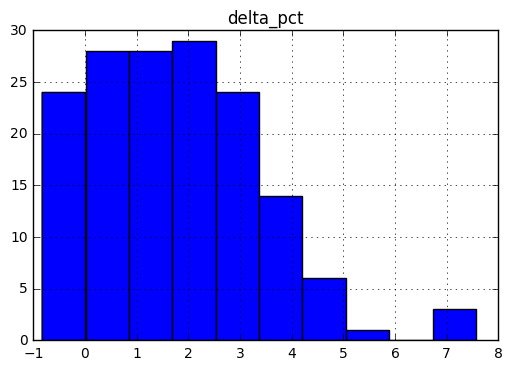

In [43]:
indicator_means.hist('delta_pct')

In [46]:
indicator_means.sort_values('delta_pct', ascending=False)[['1960', '2015', 'delta_pct']]

,,1960,2015,delta_pct
Indicator Name,Indicator Code,,,
Male population 80+,SP.POP.80UP.MA,2.295487e+05,1.664041e+06,7.568853
Female population 80+,SP.POP.80UP.FE,3.843597e+05,2.648528e+06,7.567660
Urban population,SP.URB.TOTL,3.228826e+07,1.321705e+08,7.281010
Male population 40-44,SP.POP.4044.MA,2.766925e+06,8.994947e+06,5.323497
Male population 35-39,SP.POP.3539.MA,3.265662e+06,9.276161e+06,4.975002
Male population 75-79,SP.POP.7579.MA,3.646647e+05,1.786618e+06,4.770112
Male population 30-34,SP.POP.3034.MA,3.858900e+06,1.033908e+07,4.746620
Male population 45-49,SP.POP.4549.MA,2.611358e+06,8.344219e+06,4.633512
Female population 75-79,SP.POP.7579.FE,5.389652e+05,2.269449e+06,4.381448


### 5) Which country has the lowest infant mortality rate? Which has the highest?

In [57]:
[col for col in df['Indicator Name'] if 'mortality' in col.lower()]

['Maternal mortality ratio (modeled estimate, per 100,000 live births)',
 'Maternal mortality ratio (national estimate, per 100,000 live births)',
 'Mortality caused by road traffic injury (per 100,000 people)',
 'Mortality rate, adult, female (per 1,000 female adults)',
 'Mortality rate, adult, male (per 1,000 male adults)',
 'Mortality rate, infant (per 1,000 live births)',
 'Mortality rate, infant, female (per 1,000 live births)',
 'Mortality rate, infant, male (per 1,000 live births)',
 'Mortality rate, neonatal (per 1,000 live births)',
 'Mortality rate, under-5 (per 1,000)',
 'Mortality rate, under-5, female (per 1,000)',
 'Mortality rate, under-5, male (per 1,000)',
 'Maternal mortality ratio (modeled estimate, per 100,000 live births)',
 'Maternal mortality ratio (national estimate, per 100,000 live births)',
 'Mortality caused by road traffic injury (per 100,000 people)',
 'Mortality rate, adult, female (per 1,000 female adults)',
 'Mortality rate, adult, male (per 1,000 male 

In [63]:
infant_mortality_cols = [col for col in df['Indicator Name'].unique() if 'mortality rate, infant' in col.lower()]
infant_mortality_cols

['Mortality rate, infant (per 1,000 live births)',
 'Mortality rate, infant, female (per 1,000 live births)',
 'Mortality rate, infant, male (per 1,000 live births)']

In [67]:
infant_mortality = df.set_index('Indicator Name').loc['Mortality rate, infant (per 1,000 live births)', :]
infant_mortality.head()

,Country Name,Country Code,Indicator Code,1960,1961,1962,1963,1964,1965,1966,...,2009,2010,2011,2012,2013,2014,2015,2016,delta,delta_pct
Indicator Name,,,,,,,,,,,,,,,,,,,,,
"Mortality rate, infant (per 1,000 live births)",Arab World,ARB,SP.DYN.IMRT.IN,159.950234,155.313614,152.233048,156.521984,152.166551,148.067799,144.187635,...,33.353477,32.281703,31.235308,30.333652,29.464477,28.684421,27.983485,NaN,-131.966748,-0.825049
"Mortality rate, infant (per 1,000 live births)",Caribbean small states,CSS,SP.DYN.IMRT.IN,62.071399,59.750105,57.674457,55.780086,54.086982,52.611683,51.232003,...,19.221879,18.796829,18.398032,18.020542,17.618756,17.173067,16.767874,NaN,-45.303525,-0.729862
"Mortality rate, infant (per 1,000 live births)",Central Europe and the Baltics,CEB,SP.DYN.IMRT.IN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.172798,6.746708,6.382763,6.129705,5.920011,5.754447,5.597554,NaN,NaN,NaN
"Mortality rate, infant (per 1,000 live births)",Early-demographic dividend,EAR,SP.DYN.IMRT.IN,160.306945,156.956835,153.793454,148.708240,145.800851,143.095448,140.508436,...,41.713548,40.237457,38.615829,37.192102,35.877246,34.658242,33.553852,NaN,-126.753093,-0.790690
"Mortality rate, infant (per 1,000 live births)",East Asia & Pacific,EAS,SP.DYN.IMRT.IN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,19.209825,18.211707,17.272660,16.363209,15.532499,14.802407,14.184070,NaN,NaN,NaN


In [68]:
infant_mortality.sort_values('2015').head(30)

,Country Name,Country Code,Indicator Code,1960,1961,1962,1963,1964,1965,1966,...,2009,2010,2011,2012,2013,2014,2015,2016,delta,delta_pct
Indicator Name,,,,,,,,,,,,,,,,,,,,,
"Mortality rate, infant (per 1,000 live births)",Luxembourg,LUX,SP.DYN.IMRT.IN,NaN,NaN,NaN,NaN,25.400000,24.400000,23.400000,...,2.000000,1.900000,1.800000,1.600000,1.600000,1.600000,1.50000,NaN,NaN,NaN
"Mortality rate, infant (per 1,000 live births)",Iceland,ISL,SP.DYN.IMRT.IN,17.500000,17.200000,16.900000,16.400000,16.000000,15.500000,15.000000,...,1.900000,1.900000,1.800000,1.700000,1.600000,1.600000,1.60000,NaN,-15.900000,-0.908571
"Mortality rate, infant (per 1,000 live births)",Finland,FIN,SP.DYN.IMRT.IN,21.900000,20.600000,19.500000,18.400000,17.400000,16.600000,15.800000,...,2.600000,2.500000,2.400000,2.200000,2.100000,2.000000,1.90000,NaN,-20.000000,-0.913242
"Mortality rate, infant (per 1,000 live births)",Japan,JPN,SP.DYN.IMRT.IN,30.400000,27.900000,25.500000,23.200000,21.000000,19.100000,17.500000,...,2.400000,2.400000,2.300000,2.200000,2.100000,2.100000,2.00000,NaN,-28.400000,-0.934211
"Mortality rate, infant (per 1,000 live births)",Norway,NOR,SP.DYN.IMRT.IN,18.400000,18.000000,17.500000,17.100000,16.600000,16.000000,15.400000,...,2.700000,2.600000,2.500000,2.300000,2.300000,2.200000,2.00000,NaN,-16.400000,-0.891304
"Mortality rate, infant (per 1,000 live births)",Andorra,ADO,SP.DYN.IMRT.IN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.600000,2.500000,2.400000,2.300000,2.200000,2.100000,2.10000,NaN,NaN,NaN
"Mortality rate, infant (per 1,000 live births)",Slovenia,SVN,SP.DYN.IMRT.IN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.800000,2.700000,2.600000,2.400000,2.300000,2.200000,2.10000,NaN,NaN,NaN
"Mortality rate, infant (per 1,000 live births)",Singapore,SGP,SP.DYN.IMRT.IN,35.500000,32.900000,30.800000,29.300000,28.300000,27.300000,26.400000,...,2.200000,2.200000,2.200000,2.200000,2.200000,2.200000,2.10000,NaN,-33.400000,-0.940845
"Mortality rate, infant (per 1,000 live births)",Estonia,EST,SP.DYN.IMRT.IN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.000000,3.600000,3.200000,2.900000,2.700000,2.500000,2.30000,NaN,NaN,NaN


### 6) What metrics could be utilized to represent health?

### 7) How many invalid data points can you find?

In [73]:
df.isnull().sum()

Country Name          0
Country Code          0
Indicator Name        0
Indicator Code        0
1960              53528
1961              53685
1962              53121
1963              53558
1964              53527
1965              53407
1966              53472
1967              52988
1968              53433
1969              53380
1970              52100
1971              51432
1972              50995
1973              51468
1974              51436
1975              51250
1976              51232
1977              50806
1978              51213
1979              51162
1980              50432
1981              50181
1982              49828
1983              50238
1984              50046
1985              49990
                  ...  
1989              49728
1990              41288
1991              41779
1992              41087
1993              41612
1994              41332
1995              37684
1996              37624
1997              37450
1998              37606
1999            

In [77]:
df.set_index(['Country Name', 'Indicator Name', 'Indicator Code']).dropna(how='any').shape

(0, 60)

In [79]:
indicator_means.isnull().sum()

1960         173
1961         172
1962         170
1963         174
1964         172
1965         172
1966         169
1967         170
1968         173
1969         168
1970         132
1971         137
1972         151
1973         149
1974         138
1975         131
1976         143
1977         141
1978         142
1979         143
1980         126
1981         126
1982         134
1983         125
1984         122
1985         129
1986         119
1987         113
1988         117
1989         116
1990          64
1991          62
1992          58
1993          60
1994          57
1995          41
1996          37
1997          39
1998          38
1999          36
2000          19
2001          29
2002          25
2003          27
2004          27
2005          21
2006          23
2007          21
2008          21
2009          19
2010          11
2011          18
2012          17
2013          23
2014          26
2015          91
2016         345
delta        188
delta_pct    1

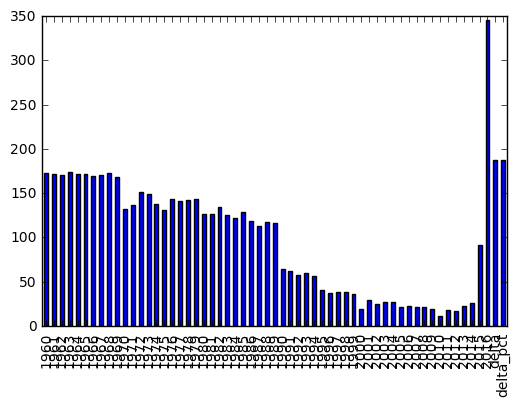

In [90]:
indicator_means.isnull().sum().plot.bar()

In [ ]:
data = [go.Bar(
            x=['giraffes', 'orangutans', 'monkeys'],
            y=[20, 14, 23]
    )]

py.iplot(data, filename='basic-bar')

### 8) Which metrics are highly correlated? (Hint: Transpose the dataset and use corr)

In [92]:
indicator_means_t = indicator_means.T
indicator_means_t.head()

Indicator Name,% of females ages 15-49 having comprehensive correct knowledge about HIV (2 prevent ways and reject 3 misconceptions),% of males ages 15-49 having comprehensive correct knowledge about HIV (2 prevent ways and reject 3 misconceptions),AIDS estimated deaths (UNAIDS estimates),ARI treatment (% of children under 5 taken to a health provider),"Adolescent fertility rate (births per 1,000 women ages 15-19)",Adults (ages 15+) and children (0-14 years) living with HIV,Adults (ages 15+) and children (ages 0-14) newly infected with HIV,Adults (ages 15+) living with HIV,Adults (ages 15+) newly infected with HIV,"Age at first marriage, female",...,Urban population,Urban population (% of total),Urban population growth (annual %),Urban poverty headcount ratio at national poverty lines (% of urban population),"Use of Intermittent Preventive Treatment of malaria, 2+ doses of SP/Fansidar (% of pregnant women)",Use of any antimalarial drug (% of pregnant women),Use of insecticide-treated bed nets (% of under-5 population),Vitamin A supplementation coverage rate (% of children ages 6-59 months),Wanted fertility rate (births per woman),Women's share of population ages 15+ living with HIV (%)
Indicator Code,SH.HIV.KNOW.FE.ZS,SH.HIV.KNOW.MA.ZS,SH.DYN.AIDS.DH,SH.STA.ARIC.ZS,SP.ADO.TFRT,SH.HIV.TOTL,SH.HIV.INCD.TL,SH.DYN.AIDS,SH.HIV.INCD,SP.DYN.SMAM.FE,...,SP.URB.TOTL,SP.URB.TOTL.IN.ZS,SP.URB.GROW,SI.POV.URHC,SH.MLR.SPF2.ZS,SH.MLR.PREG.ZS,SH.MLR.NETS.ZS,SN.ITK.VITA.ZS,SP.DYN.WFRT,SH.DYN.AIDS.FE.ZS
1960,NaN,NaN,NaN,NaN,100.790334,NaN,NaN,NaN,NaN,20.727273,...,3.228826e+07,36.578591,4.334978,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1961,NaN,NaN,NaN,NaN,100.763747,NaN,NaN,NaN,NaN,16.800000,...,3.324784e+07,37.093399,4.216836,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962,NaN,NaN,NaN,NaN,100.715669,NaN,NaN,NaN,NaN,18.900000,...,3.429781e+07,37.619930,4.280423,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1963,NaN,NaN,NaN,NaN,100.164190,NaN,NaN,NaN,NaN,NaN,...,3.545236e+07,38.156218,4.308230,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1964,NaN,NaN,NaN,NaN,99.616816,NaN,NaN,NaN,NaN,18.600000,...,3.663801e+07,38.704315,4.321490,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [94]:
indicator_means_t.columns

MultiIndex(levels=[['% of females ages 15-49 having comprehensive correct knowledge about HIV (2 prevent ways and reject 3 misconceptions)', '% of males ages 15-49 having comprehensive correct knowledge about HIV (2 prevent ways and reject 3 misconceptions)', 'AIDS estimated deaths (UNAIDS estimates)', 'ARI treatment (% of children under 5 taken to a health provider)', 'Adolescent fertility rate (births per 1,000 women ages 15-19)', 'Adults (ages 15+) and children (0-14 years) living with HIV', 'Adults (ages 15+) and children (ages 0-14) newly infected with HIV', 'Adults (ages 15+) living with HIV', 'Adults (ages 15+) newly infected with HIV', 'Age at first marriage, female', 'Age at first marriage, male', 'Age dependency ratio (% of working-age population)', 'Age dependency ratio, old', 'Age dependency ratio, young', 'Age population, age 0, female, interpolated', 'Age population, age 0, male, interpolated', 'Age population, age 01, female, interpolated', 'Age population, age 01, male,

In [95]:
indicator_means_t.dtypes

Indicator Name                                                                                                         Indicator Code   
% of females ages 15-49 having comprehensive correct knowledge about HIV (2 prevent ways and reject 3 misconceptions)  SH.HIV.KNOW.FE.ZS    float64
% of males ages 15-49 having comprehensive correct knowledge about HIV (2 prevent ways and reject 3 misconceptions)    SH.HIV.KNOW.MA.ZS    float64
AIDS estimated deaths (UNAIDS estimates)                                                                               SH.DYN.AIDS.DH       float64
ARI treatment (% of children under 5 taken to a health provider)                                                       SH.STA.ARIC.ZS       float64
Adolescent fertility rate (births per 1,000 women ages 15-19)                                                          SP.ADO.TFRT          float64
Adults (ages 15+) and children (0-14 years) living with HIV                                                            SH.H

In [96]:
correlation_ceof = indicator_means_t.corr()
correlation_ceof

,Indicator Name,% of females ages 15-49 having comprehensive correct knowledge about HIV (2 prevent ways and reject 3 misconceptions),% of males ages 15-49 having comprehensive correct knowledge about HIV (2 prevent ways and reject 3 misconceptions),AIDS estimated deaths (UNAIDS estimates),ARI treatment (% of children under 5 taken to a health provider),"Adolescent fertility rate (births per 1,000 women ages 15-19)",Adults (ages 15+) and children (0-14 years) living with HIV,Adults (ages 15+) and children (ages 0-14) newly infected with HIV,Adults (ages 15+) living with HIV,Adults (ages 15+) newly infected with HIV,"Age at first marriage, female",...,Urban population,Urban population (% of total),Urban population growth (annual %),Urban poverty headcount ratio at national poverty lines (% of urban population),"Use of Intermittent Preventive Treatment of malaria, 2+ doses of SP/Fansidar (% of pregnant women)",Use of any antimalarial drug (% of pregnant women),Use of insecticide-treated bed nets (% of under-5 population),Vitamin A supplementation coverage rate (% of children ages 6-59 months),Wanted fertility rate (births per woman),Women's share of population ages 15+ living with HIV (%)
,Indicator Code,SH.HIV.KNOW.FE.ZS,SH.HIV.KNOW.MA.ZS,SH.DYN.AIDS.DH,SH.STA.ARIC.ZS,SP.ADO.TFRT,SH.HIV.TOTL,SH.HIV.INCD.TL,SH.DYN.AIDS,SH.HIV.INCD,SP.DYN.SMAM.FE,...,SP.URB.TOTL,SP.URB.TOTL.IN.ZS,SP.URB.GROW,SI.POV.URHC,SH.MLR.SPF2.ZS,SH.MLR.PREG.ZS,SH.MLR.NETS.ZS,SN.ITK.VITA.ZS,SP.DYN.WFRT,SH.DYN.AIDS.FE.ZS
Indicator Name,Indicator Code,,,,,,,,,,,,,,,,,,,,,
% of females ages 15-49 having comprehensive correct knowledge about HIV (2 prevent ways and reject 3 misconceptions),SH.HIV.KNOW.FE.ZS,1.000000,0.819417,-0.350005,0.485796,-0.686930,0.495719,-0.712145,0.507292,-0.624830,0.630509,...,0.735121,0.728782,-0.598289,-0.688623,0.532283,0.508697,0.759131,0.839243,0.202518,0.702514
% of males ages 15-49 having comprehensive correct knowledge about HIV (2 prevent ways and reject 3 misconceptions),SH.HIV.KNOW.MA.ZS,0.819417,1.000000,-0.140476,0.585919,-0.778800,0.566033,-0.743612,0.559871,-0.707644,0.586661,...,0.688483,0.690391,-0.517702,-0.728839,0.489735,0.572152,0.615180,0.754550,0.108136,0.687580
AIDS estimated deaths (UNAIDS estimates),SH.DYN.AIDS.DH,-0.350005,-0.140476,1.000000,0.481432,-0.734047,0.824697,-0.071814,0.813532,-0.235585,0.362329,...,0.553918,0.587898,-0.627358,-0.557831,-0.810799,-0.573674,-0.742398,-0.326469,-0.465767,0.698591
ARI treatment (% of children under 5 taken to a health provider),SH.STA.ARIC.ZS,0.485796,0.585919,0.481432,1.000000,-0.740229,0.521692,-0.461639,0.514238,-0.520127,0.585172,...,0.558138,0.565970,-0.395215,-0.684014,0.094105,-0.134474,0.298808,0.520893,-0.385944,0.540663
"Adolescent fertility rate (births per 1,000 women ages 15-19)",SP.ADO.TFRT,-0.686930,-0.778800,-0.734047,-0.740229,1.000000,-0.954431,0.499874,-0.955068,0.576887,-0.891422,...,-0.996128,-0.975521,0.962097,0.803882,-0.855755,-0.621365,-0.904841,-0.609632,0.368772,-0.988940
Adults (ages 15+) and children (0-14 years) living with HIV,SH.HIV.TOTL,0.495719,0.566033,0.824697,0.521692,-0.954431,1.000000,-0.298170,0.999695,-0.396497,0.631388,...,0.897122,0.914506,-0.921747,-0.802078,0.778421,0.684587,0.855790,0.484422,-0.336325,0.971000
Adults (ages 15+) and children (ages 0-14) newly infected with HIV,SH.HIV.INCD.TL,-0.712145,-0.743612,-0.071814,-0.461639,0.499874,-0.298170,1.000000,-0.295871,0.983299,-0.645253,...,-0.623086,-0.601059,0.127923,0.320775,-0.850848,-0.557482,-0.830388,-0.639893,-0.074781,-0.430929
Adults (ages 15+) living with HIV,SH.DYN.AIDS,0.507292,0.559871,0.813532,0.514238,-0.955068,0.999695,-0.295871,1.000000,-0.391181,0.635043,...,0.900620,0.917464,-0.927490,-0.803500,0.752097,0.666295,0.866352,0.478123,-0.328759,0.973255


In [102]:
correlation_ceof.columns = [a for a,b in correlation_ceof.columns]
correlation_ceof.columns

Index(['% of females ages 15-49 having comprehensive correct knowledge about HIV (2 prevent ways and reject 3 misconceptions)',
       '% of males ages 15-49 having comprehensive correct knowledge about HIV (2 prevent ways and reject 3 misconceptions)',
       'AIDS estimated deaths (UNAIDS estimates)',
       'ARI treatment (% of children under 5 taken to a health provider)',
       'Adolescent fertility rate (births per 1,000 women ages 15-19)',
       'Adults (ages 15+) and children (0-14 years) living with HIV',
       'Adults (ages 15+) and children (ages 0-14) newly infected with HIV',
       'Adults (ages 15+) living with HIV',
       'Adults (ages 15+) newly infected with HIV',
       'Age at first marriage, female',
       ...
       'Urban population', 'Urban population (% of total)',
       'Urban population growth (annual %)',
       'Urban poverty headcount ratio at national poverty lines (% of urban population)',
       'Use of Intermittent Preventive Treatment of malaria

In [104]:
correlation_ceof.head()

,,% of females ages 15-49 having comprehensive correct knowledge about HIV (2 prevent ways and reject 3 misconceptions),% of males ages 15-49 having comprehensive correct knowledge about HIV (2 prevent ways and reject 3 misconceptions),AIDS estimated deaths (UNAIDS estimates),ARI treatment (% of children under 5 taken to a health provider),"Adolescent fertility rate (births per 1,000 women ages 15-19)",Adults (ages 15+) and children (0-14 years) living with HIV,Adults (ages 15+) and children (ages 0-14) newly infected with HIV,Adults (ages 15+) living with HIV,Adults (ages 15+) newly infected with HIV,"Age at first marriage, female",...,Urban population,Urban population (% of total),Urban population growth (annual %),Urban poverty headcount ratio at national poverty lines (% of urban population),"Use of Intermittent Preventive Treatment of malaria, 2+ doses of SP/Fansidar (% of pregnant women)",Use of any antimalarial drug (% of pregnant women),Use of insecticide-treated bed nets (% of under-5 population),Vitamin A supplementation coverage rate (% of children ages 6-59 months),Wanted fertility rate (births per woman),Women's share of population ages 15+ living with HIV (%)
Indicator Name,Indicator Code,,,,,,,,,,,,,,,,,,,,,
% of females ages 15-49 having comprehensive correct knowledge about HIV (2 prevent ways and reject 3 misconceptions),SH.HIV.KNOW.FE.ZS,1.000000,0.819417,-0.350005,0.485796,-0.686930,0.495719,-0.712145,0.507292,-0.624830,0.630509,...,0.735121,0.728782,-0.598289,-0.688623,0.532283,0.508697,0.759131,0.839243,0.202518,0.702514
% of males ages 15-49 having comprehensive correct knowledge about HIV (2 prevent ways and reject 3 misconceptions),SH.HIV.KNOW.MA.ZS,0.819417,1.000000,-0.140476,0.585919,-0.778800,0.566033,-0.743612,0.559871,-0.707644,0.586661,...,0.688483,0.690391,-0.517702,-0.728839,0.489735,0.572152,0.615180,0.754550,0.108136,0.687580
AIDS estimated deaths (UNAIDS estimates),SH.DYN.AIDS.DH,-0.350005,-0.140476,1.000000,0.481432,-0.734047,0.824697,-0.071814,0.813532,-0.235585,0.362329,...,0.553918,0.587898,-0.627358,-0.557831,-0.810799,-0.573674,-0.742398,-0.326469,-0.465767,0.698591
ARI treatment (% of children under 5 taken to a health provider),SH.STA.ARIC.ZS,0.485796,0.585919,0.481432,1.000000,-0.740229,0.521692,-0.461639,0.514238,-0.520127,0.585172,...,0.558138,0.565970,-0.395215,-0.684014,0.094105,-0.134474,0.298808,0.520893,-0.385944,0.540663
"Adolescent fertility rate (births per 1,000 women ages 15-19)",SP.ADO.TFRT,-0.686930,-0.778800,-0.734047,-0.740229,1.000000,-0.954431,0.499874,-0.955068,0.576887,-0.891422,...,-0.996128,-0.975521,0.962097,0.803882,-0.855755,-0.621365,-0.904841,-0.609632,0.368772,-0.988940


In [105]:
a = correlation_ceof.stack()
a.head()

Indicator Name                                                                                                         Indicator Code                                                                                                                          
% of females ages 15-49 having comprehensive correct knowledge about HIV (2 prevent ways and reject 3 misconceptions)  SH.HIV.KNOW.FE.ZS  % of females ages 15-49 having comprehensive correct knowledge about HIV (2 prevent ways and reject 3 misconceptions)    1.000000
                                                                                                                                          % of males ages 15-49 having comprehensive correct knowledge about HIV (2 prevent ways and reject 3 misconceptions)      0.819417
                                                                                                                                          AIDS estimated deaths (UNAIDS estimates)                              

In [106]:
a.sample()

Indicator Name                                    Indicator Code                                                        
Mortality rate, neonatal (per 1,000 live births)  SH.DYN.NMRT     Population ages 50-54, female (% of female population)   -0.978168
dtype: float64

In [117]:
type(a)

pandas.core.series.Series

In [124]:
a.values

array([-1.0000000000000002, -1.0000000000000002, -1.0000000000000002, ...,
       1.0000000000000002, 1.0000000000000002,
       Indicator Name                                                                                         Indicator Code                                                                                    
Rural population (% of total population)                                                               SP.RUR.TOTL.ZS     Cause of death, by non-communicable diseases (% of total)                          1.0
Prevalence of overweight (% of adults)                                                                 SH.STA.OW15.ZS     Age population, age 18, female, interpolated                                       1.0
Hospital beds (per 1,000 people)                                                                       SH.MED.BEDS.ZS     Cause of death, by non-communicable diseases (% of total)                          1.0
Unmet need for contraception (% of married

In [133]:
correlation_coefficients = pd.DataFrame(a)
correlation_coefficients

0
Indicator Name                                     Indicator Code                                                                                                         
Rural population (% of total population)           SP.RUR.TOTL.ZS    Cause of death, by non-communicable diseases (%...                                                 -1
Prevalence of overweight (% of adults)             SH.STA.OW15.ZS    Age population, age 18, female, interpolated                                                       -1
Hospital beds (per 1,000 people)                   SH.MED.BEDS.ZS    Cause of death, by non-communicable diseases (%...                                                 -1
Unmet need for contraception (% of married wome... SP.UWT.TFRT       Cause of death, by injury (% of total)                                                             -1
Cause of death, by injury (% of total)             SH.DTH.INJR.ZS    Age dependency ratio (% of working-age population)                                                 -1
                                                                     Age dependency ratio, young                                                                        -1
Cause of death, by non-communicable diseases (%... SH.DTH.NCOM.ZS    Population ages 35-39, male (% of male population)                                                 -1
                                                                     Population ages 35-39, female (% of female popu...                                                 -1
                                                                     Population ages 15-19, male (% of male population)                                                 -1
                                                                     Population ages 15-19, female (% of female popu...                                                 -1
Adolescent fertility rate (births per 1,000 wom... SP.ADO.TFRT       Prevalence of overweight, male (% of male adults)                                                  -1
People practicing open defecation, urban (% of ... SH.STA.ODFC.UR.ZS Cause of death, by non-communicable diseases (%...                                                 -1
Cause of death, by communicable diseases and ma... SH.DTH.COMM.ZS    Improved sanitation facilities, urban (% of urb...                                                 -1
Prevalence of overweight (% of adults)             SH.STA.OW15.ZS    Age population, age 17, female, interpolated                                                       -1
Poverty headcount ratio at national poverty lin... SI.POV.NAHC       Cause of death, by non-communicable diseases (%...                                                 -1
Prevalence of overweight (% of adults)             SH.STA.OW15.ZS    Age population, age 16, male, interpolated                                                         -1
Number of neonatal deaths                          SH.DTH.NMRT       Cause of death, by non-communicable diseases (%...                                                 -1
Prevalence of wasting, male (% of children unde... SH.STA.WAST.MA.ZS Cause of death, by non-communicable diseases (%...                                                 -1
Mortality rate, under-5, male (per 1,000)          SH.DYN.MORT.MA    Health expenditure, public (% of GDP)                                                              -1
Unmet need for contraception (% of married wome... SP.UWT.TFRT       Cause of death, by non-communicable diseases (%...                                                 -1
Cause of death, by injury (% of total)             SH.DTH.INJR.ZS    AIDS estimated deaths (UNAIDS estimates)                                                           -1
Cause of death, by non-communicable diseases (%... SH.DTH.NCOM.ZS    Poverty headcount ratio at national poverty lin...                                                 -1
                                                                 

In [135]:
correlation_coefficients[0]

Indicator Name                                                                                         Indicator Code                                                                                    
Rural population (% of total population)                                                               SP.RUR.TOTL.ZS     Cause of death, by non-communicable diseases (% of total)                                                                         -1
Prevalence of overweight (% of adults)                                                                 SH.STA.OW15.ZS     Age population, age 18, female, interpolated                                                                                      -1
Hospital beds (per 1,000 people)                                                                       SH.MED.BEDS.ZS     Cause of death, by non-communicable diseases (% of total)                                                                         -1
Unmet need for contraception (% o

In [138]:
c = correlation_coefficients.reset_index()

In [139]:
c.head()

,Indicator Name,Indicator Code,level_2,0
0,Rural population (% of total population),SP.RUR.TOTL.ZS,"Cause of death, by non-communicable diseases (...",-1
1,Prevalence of overweight (% of adults),SH.STA.OW15.ZS,"Age population, age 18, female, interpolated",-1
2,"Hospital beds (per 1,000 people)",SH.MED.BEDS.ZS,"Cause of death, by non-communicable diseases (...",-1
3,Unmet need for contraception (% of married wom...,SP.UWT.TFRT,"Cause of death, by injury (% of total)",-1
4,"Cause of death, by injury (% of total)",SH.DTH.INJR.ZS,Age dependency ratio (% of working-age populat...,-1


In [141]:
c.rename(columns={0:'rsq'}, inplace=True)

c.head()

,Indicator Name,Indicator Code,level_2,rsq
0,Rural population (% of total population),SP.RUR.TOTL.ZS,"Cause of death, by non-communicable diseases (...",-1
1,Prevalence of overweight (% of adults),SH.STA.OW15.ZS,"Age population, age 18, female, interpolated",-1
2,"Hospital beds (per 1,000 people)",SH.MED.BEDS.ZS,"Cause of death, by non-communicable diseases (...",-1
3,Unmet need for contraception (% of married wom...,SP.UWT.TFRT,"Cause of death, by injury (% of total)",-1
4,"Cause of death, by injury (% of total)",SH.DTH.INJR.ZS,Age dependency ratio (% of working-age populat...,-1


In [155]:
type(c['rsq'][0])

float

In [161]:
c.to_csv('correlation.csv')

In [168]:
import numpy as np

In [170]:
d = pd.read_csv('correlation.csv')
d.head()

ValueError: could not convert string to float: 'Indicator Name                                                                                         Indicator Code                                                                                    \nRural population (% of total population)                                                               SP.RUR.TOTL.ZS     Cause of death, by non-communicable diseases (% of total)                          1.0\nPrevalence of overweight (% of adults)                                                                 SH.STA.OW15.ZS     Age population, age 18, female, interpolated                                       1.0\nHospital beds (per 1,000 people)                                                                       SH.MED.BEDS.ZS     Cause of death, by non-communicable diseases (% of total)                          1.0\nUnmet need for contraception (% of married women ages 15-49)                                           SP.UWT.TFRT        Cause of death, by injury (% of total)                                             1.0\nCause of death, by injury (% of total)                                                                 SH.DTH.INJR.ZS     Age dependency ratio (% of working-age population)                                 1.0\n                                                                                                                          Age dependency ratio, young                                                        1.0\nCause of death, by non-communicable diseases (% of total)                                              SH.DTH.NCOM.ZS     Population ages 35-39, male (% of male population)                                 1.0\n                                                                                                                          Population ages 35-39, female (% of female population)                             1.0\n                                                                                                                          Population ages 15-19, male (% of male population)                                 1.0\n                                                                                                                          Population ages 15-19, female (% of female population)                             1.0\nAdolescent fertility rate (births per 1,000 women ages 15-19)                                          SP.ADO.TFRT        Prevalence of overweight, male (% of male adults)                                  1.0\nPeople practicing open defecation, urban (% of urban population)                                       SH.STA.ODFC.UR.ZS  Cause of death, by non-communicable diseases (% of total)                          1.0\nCause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total)  SH.DTH.COMM.ZS     Improved sanitation facilities, urban (% of urban population with access)          1.0\nPrevalence of overweight (% of adults)                                                                 SH.STA.OW15.ZS     Age population, age 17, female, interpolated                                       1.0\nPoverty headcount ratio at national poverty line (% of population)                                     SI.POV.NAHC        Cause of death, by non-communicable diseases (% of total)                          1.0\nPrevalence of overweight (% of adults)                                                                 SH.STA.OW15.ZS     Age population, age 16, male, interpolated                                         1.0\nNumber of neonatal deaths                                                                              SH.DTH.NMRT        Cause of death, by non-communicable diseases (% of total)                          1.0\nPrevalence of wasting, male (% of children under 5)                                                    SH.STA.WAST.MA.ZS  Cause of death, by non-communicable diseases (% of total)                          1.0\nMortality rate, under-5, male (per 1,000)                                                              SH.DYN.MORT.MA     Health expenditure, public (% of GDP)                                              1.0\nUnmet need for contraception (% of married women ages 15-49)                                           SP.UWT.TFRT        Cause of death, by non-communicable diseases (% of total)                          1.0\nCause of death, by injury (% of total)                                                                 SH.DTH.INJR.ZS     AIDS estimated deaths (UNAIDS estimates)                                           1.0\nCause of death, by non-communicable diseases (% of total)                                              SH.DTH.NCOM.ZS     Poverty headcount ratio at national poverty line (% of population)                 1.0\n                                                                                                                          Prevalence of severe wasting, weight for height, female (% of children under 5)    1.0\n                                                                                                                          Prevalence of severe wasting, weight for height (% of children under 5)            1.0\nTuberculosis death rate (per 100,000 people)                                                           SH.TBS.MORT        Cause of death, by non-communicable diseases (% of total)                          1.0\nPrevalence of overweight (% of adults)                                                                 SH.STA.OW15.ZS     Death rate, crude (per 1,000 people)                                               1.0\nImmunization, BCG (% of one-year-old children)                                                         SH.IMM.IBCG        Prevalence of overweight, male (% of male adults)                                  1.0\nPrevalence of wasting (% of children under 5)                                                          SH.STA.WAST.ZS     Prevalence of overweight, male (% of male adults)                                  1.0\nCause of death, by non-communicable diseases (% of total)                                              SH.DTH.NCOM.ZS     Prevalence of HIV, total (% of population ages 15-49)                              1.0\nCause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total)  SH.DTH.COMM.ZS     Life expectancy at birth, total (years)                                            1.0\n                                                                                                                                                                                                            ... \nPrevalence of overweight, female (% of female adults)                                                  SH.STA.OW15.FE.ZS  School enrollment, secondary, female (% gross)                                     1.0\nCause of death, by injury (% of total)                                                                 SH.DTH.INJR.ZS     Literacy rate, youth total (% of people ages 15-24)                                1.0\n                                                                                                                          Male population 60-64                                                              1.0\nHealth expenditure, public (% of government expenditure)                                               SH.XPD.PUBL.GX.ZS  Cause of death, by non-communicable diseases (% of total)                          1.0\nHealth expenditure, public (% of total health expenditure)                                             SH.XPD.PUBL        Prevalence of overweight (% of adults)                                             1.0\nCause of death, by injury (% of total)                                                                 SH.DTH.INJR.ZS     Improved sanitation facilities, rural (% of rural population with access)          1.0\n                                                                                                                          Improved sanitation facilities (% of population with access)                       1.0\nPrevalence of overweight, female (% of female adults)                                                  SH.STA.OW15.FE.ZS  Use of insecticide-treated bed nets (% of under-5 population)                      1.0\nHealth expenditure, public (% of total health expenditure)                                             SH.XPD.PUBL        Prevalence of overweight, male (% of male adults)                                  1.0\nCause of death, by injury (% of total)                                                                 SH.DTH.INJR.ZS     Immunization, HepB3 (% of one-year-old children)                                   1.0\nPopulation ages 80 and older, male (% of male population)                                              SP.POP.80UP.MA.5Y  Cause of death, by non-communicable diseases (% of total)                          1.0\nCause of death, by injury (% of total)                                                                 SH.DTH.INJR.ZS     Immunization, BCG (% of one-year-old children)                                     1.0\n                                                                                                                          Male population 65-69                                                              1.0\nPopulation, male                                                                                       SP.POP.TOTL.MA.IN  Cause of death, by injury (% of total)                                             1.0\nCause of death, by injury (% of total)                                                                 SH.DTH.INJR.ZS     Population, male                                                                   1.0\nFemale population 75-79                                                                                SP.POP.7579.FE     Cause of death, by non-communicable diseases (% of total)                          1.0\nVitamin A supplementation coverage rate (% of children ages 6-59 months)                               SN.ITK.VITA.ZS     Cause of death, by non-communicable diseases (% of total)                          1.0\nFemale population 80+                                                                                  SP.POP.80UP.FE     Cause of death, by injury (% of total)                                             1.0\nPregnant women receiving prenatal care (%)                                                             SH.STA.ANVC.ZS     Cause of death, by non-communicable diseases (% of total)                          1.0\nCause of death, by injury (% of total)                                                                 SH.DTH.INJR.ZS     Population ages 65 and above (% of total)                                          1.0\nPrevalence of overweight, female (% of female adults)                                                  SH.STA.OW15.FE.ZS  Primary completion rate, total (% of relevant age group)                           1.0\nHealth expenditure per capita (current US$)                                                            SH.XPD.PCAP        Cause of death, by non-communicable diseases (% of total)                          1.0\nPrevalence of overweight, female (% of female adults)                                                  SH.STA.OW15.FE.ZS  Population ages 65 and above, total                                                1.0\nCause of death, by injury (% of total)                                                                 SH.DTH.INJR.ZS     Population ages 20-24, male (% of male population)                                 1.0\n                                                                                                                          Population ages 20-24, female (% of female population)                             1.0\nHealth expenditure per capita, PPP                                                                     SH.XPD.PCAP.PP.KD  Prevalence of overweight, male (% of male adults)                                  1.0\nCause of death, by injury (% of total)                                                                 SH.DTH.INJR.ZS     Population ages 15-64, female (% of total)                                         1.0\nPopulation, male                                                                                       SP.POP.TOTL.MA.IN  Cause of death, by non-communicable diseases (% of total)                          1.0\nCause of death, by injury (% of total)                                                                 SH.DTH.INJR.ZS     Population ages 40-44, male (% of male population)                                 1.0\n                                                                                                                          Completeness of birth registration, rural (%)                                      1.0\ndtype: float64'

In [172]:
d['rsq']

0                                       -1.0000000000000002
1                                       -1.0000000000000002
2                                       -1.0000000000000002
3                                       -1.0000000000000002
4                                       -1.0000000000000002
5                                       -1.0000000000000002
6                                       -1.0000000000000002
7                                       -1.0000000000000002
8                                       -1.0000000000000002
9                                       -1.0000000000000002
10                                      -1.0000000000000002
11                                      -1.0000000000000002
12                                      -1.0000000000000002
13                                      -1.0000000000000002
14                                      -1.0000000000000002
15                                      -1.0000000000000002
16                                      